In [1]:
import requests as req
!pip install plotly
!pip install datascience
!pip install pandas
!pip install numpy
!pip install webcolors
!pip install matplotlib inline
!pip install matplotlib
!pip install dash_html_components
#https://reeddesign.co.uk/test/namedcolors.html 

In [2]:
from datascience import *
from math import *
import pandas as pd
import numpy as np
from webcolors import hex_to_rgb
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.validators.scatter.marker import SymbolValidator
import plotly.graph_objects as go

In [3]:
init_notebook_mode(connected=True) 

<span style="color:red;font-weight:10;font-size:30px">
<u><b>1️⃣💉🐭💬 READ THESE INSTRUCTIONS:</b></u> <br>
<span style="color:red;font-weight:10;font-size:20px">  
If your csv file is not called "antibody_flow_chart", replace the info below where it says <mark>"antibody_flow_chart.csv"</mark> with <mark>"your_file_name.csv"</mark>. If it is, then proceed to next step. <br> <br> It is important that ".csv" is there.

In [27]:
Project = Table.read_table("05082024_ExampleDataSet.csv")
Project.show()

Info for plot,Unnamed: 1,Unnamed: 2,Unnamed: 3,CHANGE YELLOW HIGHLIGHT,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,SankeyTitle,node_label,x_posi,y_posi,node_color,node_color_rgba,node_hover,source,target,value,link_hover,link_colorrr,Unnamed: 25,index,Unnamed: 27,Hybridoma ID,Clone A or B or Poly?,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Notes
SR#,#####,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,SR##### Client [Target]Hybridoma antibody discove ...,Fusion 1 # hybridomas = 2304Fusion efficiency = ...,-0.01,0.25,#ffd700,"rgba(255,215,0, 0.4)",Fusion efficiency = 1.2Fused b-cells: Lymphocytes< ...,Fusion 1 # hybridomas = 2304Fusion efficiency = ...,Primaryscreen384 hits,2304,"Fusion efficiency =1.2Pool 1 LymphocytesMse 9, 1 ...","rgba(255,215,0, 0.4)",nan,0,nan,nan,nan,nan,nan,nan,nan,*Helpful link to color codes:
Client,Client,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Fusion 2 # hybridomas = 2496Fusion efficiency = ...,-0.01,0.75,#800080,"rgba(128,0,128, 0.4)","Fusion efficiency = 1.3Pool 2 LymphocytesMse 9, ...",Fusion 2 # hybridomas = 2496Fusion efficiency = ...,Primaryscreen384 hits,2496,"Fusion efficiency =1.3Pool 1 LymphocytesMse 1, 2 ...","rgba(128,0,128, 0.4)",nan,1,nan,nan,nan,nan,nan,nan,nan,https://reeddesign.co.uk/test/namedcolors.html
Target,[Target],nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Primaryscreen384 hits,0.2,0.5,#000000,"rgba(0,0,0)",4800 Screened against 1ug/mL Target-His by ELISA ...,Fusion 1 # hybridomas = 2304Fusion efficiency = ...,Confirmationscreen355 ...,192,,"rgba(255,215,0, 0.4)",nan,2,nan,nan,nan,nan,nan,nan,nan,https://www.rapidtables.com/convert/color/hex-to-rgb.html
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Confirmationscreen355 ...,0.3,0.25,#000000,"rgba(0,0,0)",384 Screened against 1ug/mL Target-His by ELISA3 ...,Fusion 2 # hybridomas = 2496Fusion efficiency = ...,Confirmationscreen355 ...,192,,"rgba(128,0,128, 0.4)",nan,3,nan,nan,nan,nan,nan,nan,nan,*It's important that all names under source and target e ...
Fusion 1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Tertiary screen337/355 hi ...,0.4,0.35,#000000,"rgba(0,0,0)",355 screened against 1ug/mL Target-His by ELISA ...,Confirmationscreen355 ...,Tertiary screen337/355 hi ...,187,,"rgba(255,215,0, 0.4)",nan,4,nan,nan,nan,nan,nan,nan,nan,nan
# hybridomas =,2304,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Clone A(24/24),0.65,0.1,#00008b,"rgba(0, 0, 139)",24 Clone A's obtained out of 24Clone screen RLU: <b ...,Confirmationscreen355 ...,Tertiary screen337/355 hi ...,187,,"rgba(128,0,128, 0.4)",nan,5,nan,nan,nan,nan,nan,nan,nan,nan
Fusion efficiency =,1.2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Clone B (21/24),0.65,0.3,#00008b,"rgba(0, 0, 139)",21 Clone B's obtained out of 24Clone screen RLU: <b ...,Clone A(24/24),BVP(21/24 clean),20,testA,"rgba(30,144,255, 0.4)",nan,6,nan,nan,nan,nan,nan,nan,nan,nan
# of wells screened:,1920,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,BVP(21/24 clean),0.95,0.35,#1e90ff,"rgba(30, 144, 255)",21 Clones clean against BVPBVP RLU: 2-O1 (RLU:# ...,Clone B (21/24),BVP(21/24 clean),3,testB,"rgba(30,144,255, 0.4)",nan,7,nan,nan,nan,nan,nan,nan,nan,nan
Mse ID#,"9, 10",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Sequencing ( Single heavy & light chain o ...,0.9,0.5,#ff0000,"rgba(255,0,0, 0.4)",19 Unique: 3-O214-A164-N15-I195-L22< ...,Clone A(24/24),Sequencing ( Single heavy & light chain o ...,20,testA,"rgba(255,0,0, 0.4)",nan,8,nan,nan,nan,nan,nan,nan,nan,nan
Mse strain(s):,qxv,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2-O1,0.45,0.6,#ffd700,"rgba(255,215,0,0.4)",1*Screen RLU: 9055992*Screen RLU: 3926233*Scre ...,Clone B (21/24),Sequencing ( Single heavy & light chain o ...,3,testB,"rgba(255,0,0, 0.4)",nan,9,nan,2-O1,A,nan,nan,nan,nan,nan


In [28]:
AntibodyRecoveryHits = Table.read_table("AntibodyRecoveryHits.csv")
AntibodyRecoveryHits.show(5)

Primary1,Confirmation1,Tertiary1,Primary2,Confirmation2,Tertiary2
[192 HITS],[187 HITS],nan,[192 HITS],[187 HITS],nan
1-A2,1-B21,1-B7,4-K20,4-K7,4-M3
1-B21,1-B7,1-C17,4-K7,4-M3,4-O11
1-B3,1-C13,1-C6,4-M24,4-N1,4-O23
1-B7,1-C17,1-D11,4-M3,4-O11,4-P3


In [29]:
#Turn all arrays into usable lists
node_label = Project.column("node_label")
node_label = node_label.tolist()

source = Project.column("source")
source = source.tolist()

target = Project.column("target")
target = target.tolist()

value = Project.column("value")
value = value.tolist()

node_color = Project.column("node_color")
node_color = node_color.tolist()

project_title = Project.column("SankeyTitle")
project_title = project_title.tolist()
project_title = project_title[0]

node_hover = Project.column("node_hover")
node_hover = node_hover.tolist()

link_hover = Project.column("link_hover")
link_hover = link_hover.tolist()

link_colorrr = Project.column("link_colorrr")
link_colorrr = link_colorrr.tolist()

AR1F1screen_array = AntibodyRecoveryHits.column("Primary1")
AR1F1screen_list = AR1F1screen_array.tolist()
AR1F2screen_array = AntibodyRecoveryHits.column("Primary2")
AR1F2screen_list = AR1F2screen_array.tolist()

AR2F1screen_array = AntibodyRecoveryHits.column("Confirmation1")
AR2F1screen_list = AR2F1screen_array.tolist()
AR2F2screen_array = AntibodyRecoveryHits.column("Confirmation2")
AR2F2screen_list = AR2F2screen_array.tolist()

AR3F1screen_array = AntibodyRecoveryHits.column("Tertiary1")
AR3F1screen_list = AR3F1screen_array.tolist()
AR3F2screen_array = AntibodyRecoveryHits.column("Tertiary2")
AR3F2screen_list = AR3F2screen_array.tolist()

In [30]:
#Python read empty excel cells as "nan". Remove the "nan" from the lists. 
nan = "nan"
def remove_nan (list, nan):
    while nan in list:
        list.remove(nan)
    return list

In [31]:
node_label = remove_nan(node_label, nan)
source = remove_nan(source, nan)
target = remove_nan(target, nan)
value = remove_nan(value, nan)
node_color = remove_nan(node_color, nan)
node_hover = remove_nan(node_hover, nan)
link_hover = remove_nan(link_hover, nan)
link_colorrr = remove_nan(link_colorrr, nan)
AR1F1screen = remove_nan(AR1F1screen_list, nan)
AR2F1screen = remove_nan(AR2F1screen_list, nan)
AR3F1screen = remove_nan(AR3F1screen_list, nan)
AR1F2screen = remove_nan(AR1F2screen_list, nan)
AR2F2screen = remove_nan(AR2F2screen_list, nan)
AR3F2screen = remove_nan(AR3F2screen_list, nan)

In [32]:
def ExtraSpace(list):
    '''add 1 or 2 spaces depending on lenght of item'''
    for i in range(len(list)):
        if len(list[i]) == 5:
            list[i] += "  " #1 space
        if len(list[i]) == 4:
            list[i] += "   " #2 spaces
        else:
            continue
    return list 

def sublist(list, size):
    '''Create sublists of size# elements from a bigger list'''
    sublists = []
    for i in range(0, len(list), size): 
        sublist = list[i:i + size]
        sublists.append(sublist)
    return sublists

def AntibodyRecoveryBr(list):
    '''Add <br> between each item in a list before subcloning'''
    for i in range(1, len(list) * 2, 2):
        list.insert(i, ["<br>"])
    return list

def br(list):
    '''Add <br> between each item in a list after subcloning'''
    for i in range(1, len(list) * 2, 2):
        list.insert(i, "<br>")
    return list

def TextTable(list):
    '''Turn list into string types'''
    a = ""
    for i in list:
        for ii in i:
            a += (f"{' '}{ii},")
    return a

In [33]:
HybridomaID = Project.column("Hybridoma ID")
HybridomaID = HybridomaID.tolist()
HybridomaID = remove_nan(HybridomaID, nan)
CloneABPoly = Project.column("Clone A or B or Poly?")
CloneABPoly = CloneABPoly.tolist()
CloneABPoly = remove_nan(CloneABPoly, nan)

Dict_CloneABPoly = zip(HybridomaID,CloneABPoly)
Dict_CloneABPoly = dict(Dict_CloneABPoly)
Dict_CloneABPoly

A_clones = []
B_clones = []
Poly_clones = []

for k , v in Dict_CloneABPoly.items():
    if  v == "A":
        A_clones.append(k)
    elif v == "B":
        B_clones.append(k)
    else:
        Poly_clones.append(k)

A_clones = br(A_clones)
B_clones = br(B_clones)
Poly_clones = br(Poly_clones)

In [34]:
AR1F1Screen = ExtraSpace(AR1F1screen) 
sublist_AR1F1Screen = sublist(AR1F1Screen, 20)
sublist_AR1F1Screen = AntibodyRecoveryBr(sublist_AR1F1Screen)

AR1F2Screen = ExtraSpace(AR1F2screen) 
sublist_AR1F2Screen = sublist(AR1F2Screen, 20)
sublist_AR1F2Screen = AntibodyRecoveryBr(sublist_AR1F2Screen)

AR2F1Screen = ExtraSpace(AR2F1screen) 
sublist_AR2F1Screen = sublist(AR2F1Screen, 20)
sublist_AR2F1Screen = AntibodyRecoveryBr(sublist_AR2F1Screen)

AR2F2Screen = ExtraSpace(AR2F2screen) 
sublist_AR2F2Screen = sublist(AR2F2Screen, 20)
sublist_AR2F2Screen = AntibodyRecoveryBr(sublist_AR2F2Screen)

AR3F1Screen = ExtraSpace(AR3F1screen) 
sublist_AR3F1Screen = sublist(AR3F1Screen, 20)
sublist_AR3F1Screen = AntibodyRecoveryBr(sublist_AR3F1Screen)

AR3F2Screen = ExtraSpace(AR3F2screen) 
sublist_AR3F2Screen = sublist(AR3F2Screen, 20)
sublist_AR3F2Screen = AntibodyRecoveryBr(sublist_AR3F2Screen)
sublist_AR3F2Screen

[['4-M3   ',
  '4-O11  ',
  '4-O23  ',
  '4-P3   ',
  '5-A17  ',
  '5-A5   ',
  '5-A8   ',
  '5-B13  ',
  '5-B20  ',
  '5-B7   ',
  '5-C10  ',
  '5-C14  ',
  '5-C4   ',
  '5-D15  ',
  '5-D24  ',
  '5-E12  ',
  '5-E18  ',
  '5-E7   ',
  '5-F4   ',
  '5-G19  '],
 ['<br>'],
 ['5-G5   ',
  '5-H14  ',
  '5-H21  ',
  '5-H3   ',
  '5-H4   ',
  '5-I5   ',
  '5-I9   ',
  '5-J14  ',
  '5-J21  ',
  '5-J23  ',
  '5-J3   ',
  '5-J6   ',
  '5-K22  ',
  '5-K8   ',
  '5-L20  ',
  '5-L21  ',
  '5-L22  ',
  '5-L4   ',
  '5-L8   ',
  '5-M11  '],
 ['<br>'],
 ['5-M17  ',
  '5-N10  ',
  '5-N14  ',
  '5-N20  ',
  '5-N24  ',
  '5-N5   ',
  '5-N9   ',
  '5-O9   ',
  '5-P10  ',
  '5-P23  ',
  '5-P5   ',
  '6-A16  ',
  '6-A2   ',
  '6-A3   ',
  '6-D4   ',
  '6-E22  ',
  '6-F23  ',
  '6-F24  ',
  '6-G3   ',
  '6-G9   '],
 ['<br>'],
 ['6-H13  ',
  '6-I12  ',
  '6-I7   ',
  '6-J17  ',
  '6-J21  ',
  '6-J9   ',
  '6-M10  ',
  '6-M14  ',
  '6-P11  ',
  '6-P14  ',
  '6-P2   ',
  '7-A1   ',
  '7-A13  ',
  '7-A14  ',
  

In [35]:
TextTable_AR1F1Screen = TextTable(sublist_AR1F1Screen)
TextTable_AR2F1Screen = TextTable(sublist_AR2F1Screen)
TextTable_AR3F1Screen = TextTable(sublist_AR3F1Screen)
TextTable_AR1F2Screen = TextTable(sublist_AR1F2Screen)
TextTable_AR2F2Screen = TextTable(sublist_AR2F2Screen)
TextTable_AR3F2Screen = TextTable(sublist_AR3F2Screen)
TextTable_A_clones = ''.join(A_clones)
TextTable_B_clones = ''.join(B_clones)
TextTable_Poly_clones = ''.join(Poly_clones)

link_hover[2] = TextTable_AR1F1Screen
link_hover[3] = TextTable_AR1F2Screen
link_hover[4] = TextTable_AR2F1Screen
link_hover[5] = TextTable_AR2F2Screen
#link_hover[6] = TextTable_AR3F1Screen #Include if profile nodes exist between tertiary screen and subcloning. 
#link_hover[7] = TextTable_AR3F2Screen #Include if profile nodes exist between tertiary screen and subcloning. 
link_hover[6] = TextTable_A_clones
link_hover[8] = TextTable_A_clones
link_hover[7] = TextTable_B_clones
link_hover[9] = TextTable_B_clones
link_hover[82] = TextTable_Poly_clones
link_hover[83] = TextTable_Poly_clones

In [36]:
#List comprehension to create node color to match link color.
node_label_color = {x:y for x, y in zip(node_label, node_color)}
link_color = [node_label_color[x] for x in target]
link_color = ["rgba({},{},{}, 0.4)".format(hex_to_rgb(x)[0], hex_to_rgb(x)[1], hex_to_rgb(x)[2]) for x in link_color] 
link_color

['rgba(0,0,0, 0.4)',
 'rgba(0,0,0, 0.4)',
 'rgba(0,0,0, 0.4)',
 'rgba(0,0,0, 0.4)',
 'rgba(0,0,0, 0.4)',
 'rgba(0,0,0, 0.4)',
 'rgba(30,144,255, 0.4)',
 'rgba(30,144,255, 0.4)',
 'rgba(255,0,0, 0.4)',
 'rgba(255,0,0, 0.4)',
 'rgba(255,215,0, 0.4)',
 'rgba(255,215,0, 0.4)',
 'rgba(255,215,0, 0.4)',
 'rgba(255,215,0, 0.4)',
 'rgba(255,215,0, 0.4)',
 'rgba(255,215,0, 0.4)',
 'rgba(255,215,0, 0.4)',
 'rgba(255,215,0, 0.4)',
 'rgba(255,215,0, 0.4)',
 'rgba(255,215,0, 0.4)',
 'rgba(255,215,0, 0.4)',
 'rgba(255,215,0, 0.4)',
 'rgba(128,0,128, 0.4)',
 'rgba(128,0,128, 0.4)',
 'rgba(128,0,128, 0.4)',
 'rgba(128,0,128, 0.4)',
 'rgba(128,0,128, 0.4)',
 'rgba(128,0,128, 0.4)',
 'rgba(128,0,128, 0.4)',
 'rgba(128,0,128, 0.4)',
 'rgba(128,0,128, 0.4)',
 'rgba(128,0,128, 0.4)',
 'rgba(128,0,128, 0.4)',
 'rgba(128,0,128, 0.4)',
 'rgba(0,0,139, 0.4)',
 'rgba(0,0,139, 0.4)',
 'rgba(0,0,139, 0.4)',
 'rgba(0,0,139, 0.4)',
 'rgba(0,0,139, 0.4)',
 'rgba(0,0,139, 0.4)',
 'rgba(0,0,139, 0.4)',
 'rgba(0,0,139,

In [37]:
#Create a dictionary for the node labels as keys assigned to a value
node_dict = {y:x for x, y in enumerate(node_label)}
node_dict

{'Fusion 1 <br># hybridomas =  2304<br>Fusion efficiency =  1.2<br># of wells screened:  1920<br>Mse ID#  9, 10<br>Mse strain(s):  qxv<br>Fused b-cells:  Lymphocytes<br>Immunization method:  HT-Hock<br>Immunogen:  aaa<br>Final boost:  aaa': 0,
 'Fusion 2 <br># hybridomas =  2496<br>Fusion efficiency =  1.3<br># of wells screened:  1920<br>Mse ID#  1, 2, 4, 8<br>Mse strain(s):  Mixed, bxs, kxg7<br>Fused b-cells:  Lymphocytes<br>Immunization method:  HT-Hock<br>Immunogen:  aaa<br>Final boost:  aaa': 1,
 "<b>Primary<br>screen<br><span style='color:red'>384 hits": 2,
 "<b>Confirmation<br>screen<br><span style='color:red'>355/384hits": 3,
 "<b>Tertiary screen<br><span style='color:red'>337/355 hits<br><span style='color:black'><b>expanded & cryopreserved": 4,
 'Clone A<br>(24/24)': 5,
 'Clone B (21/24)': 6,
 'BVP<br>(21/24 clean)': 7,
 '<b>Sequencing</b> <br>( Single heavy & light<br> chain obtained<br> for 21/24)': 8,
 '2-O1': 9,
 '3-D11': 10,
 '3-O21': 11,
 '4-A16': 12,
 '4-N1': 13,
 '5-I

In [38]:
#MODIFY 
#Enter "experiment name" between [] for node_label.   
node_dict = {y:x for x, y in enumerate(node_label)}
node_dict
#Trying to get text to align right on node
node_alignment_dict = {}
for i in node_label:
    node_alignment_dict[i] = "right"

In [39]:
#More list comprehensions
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [41]:
Layout = go.Layout(font_size = 12)
#Sankey parameters
fig = go.Figure(
    layout = Layout,
    data=[go.Sankey(
        node = dict(
            label = node_label,
            color = node_color,
            x = x_posi,
            y = y_posi,
            customdata = node_hover,
            hovertemplate= '%{customdata}'
        ),
        link = dict(
            source = source_node,
            target = target_node,
            value = value, 
            color = link_colorrr,
            customdata = link_hover,
            hovertemplate= '%{customdata}'
        ))])

In [42]:
#Making imaginary grid to guide me on node placement and static annotation placement
fig_annotate = fig.add_trace(go.Scatter(
    x=[1],
    y=[1],
    mode = "none"))

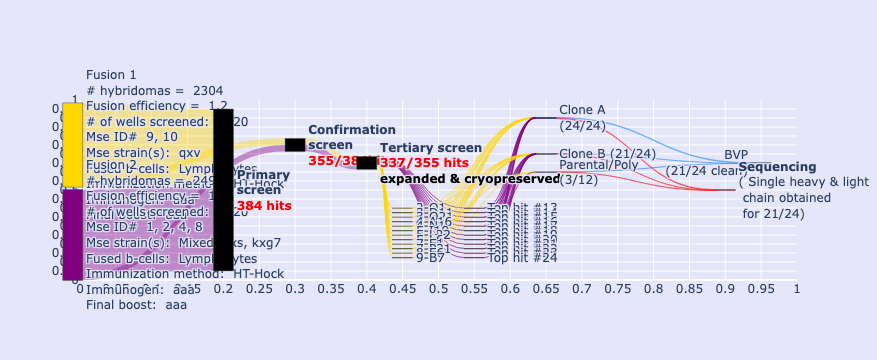

In [43]:
fig_annotate.update_xaxes(showticklabels=True,
                          showgrid=True,
                          dtick=0.05,
                          range = [0,1])
fig_annotate.update_yaxes(showticklabels=True,
                          showgrid=True,
                          dtick=0.05,
                          range = [0,1])

#temporary background color to make gridlines more obvious. 
fig_annotate.update_layout({"plot_bgcolor": "#e6e6fa",
                            "paper_bgcolor": "#e6e6fa"}) 

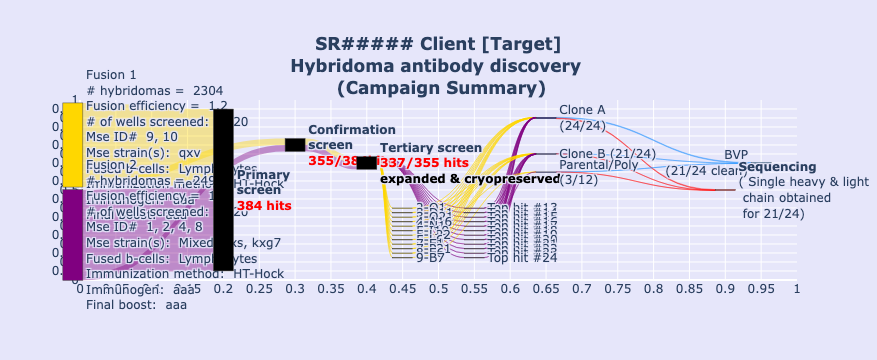

In [44]:
#Center the title
fig_annotate.update_layout(
    title= project_title,
    title_x = 0.5)

<span style="color:red;font-weight:10;font-size:30px">
<b><u>2️⃣💉🐭💬 READ THESE INSTRUCTIONS:</b> </u><br>
    
<span style="color:red;font-weight:10;font-size:20px">  
To add or edit another note, type and fill in the following:<br>
<div class="alert alert-block alert-warning">
<b> add_custom_annotation(figure, <span style="color: blue;">x</span>, <span style="color: blue;">y</span>, <span style="color: blue;">"text"</span>, 
                         <span style="color: black;">size=12</span>, <span style="color: black;">family="Sans-serif"</span>,<span style="color: black;">color="#000000"</span>, <span style="color: black;">align="left"</span>) </b>
</div>

<span style="color:red;font-weight:10;font-size:20px"> 
🧀 Your parameters <span style="color: blue;">x</span> and <span style="color: blue;">y</span> will be replaced with numbers, and they are the (x,y) location of your note based on the gridlines in the image generated from above. 
<br>
🧀 Your parameter <span style="color: blue;">"text"</span> will be your note written in between quotation marks.
<br>
🧀 The following 4 paramters (<span style="color: black;">size</span>, <span style="color: black;">family</span>, <span style="color: black;">color</span>, <span style="color: black;">align</span> ) are optional and does not need to be written in. Their defaults are listed above, but you can modify them if you wish to change the size, font, color, or alignment of your note. 
<br>
🧀 If you want to change the color, use these color codes found in url's here: 

https://www.quackit.com/css/css_color_codes.cfm <br>
https://reeddesign.co.uk/test/namedcolors.html 

In [47]:
def add_custom_annotation(figure, x, y, text, size=12, family="Sans-serif", color = "#000000", xref="x", yref="y", align="left"):
    '''For adding static annotations'''
    fig.add_annotation(
        x=x, y=y,
        xref=xref, yref=yref,
        text=text,
        showarrow=False,
        font=dict(
            family=family,
            size=size,
            color=color),   
        align=align,
        bgcolor="rgba(0,0,0,0)",
        opacity=1)

In [48]:
add_custom_annotation(fig_annotate, 0.52, 0.48, "<span style='color:red;font-weight:10;font-size:15px'><b>(Subclone Top 12 against <br>target1/target2/target3)<b>", align = "center") #Subcloning 

In [49]:
#Color code for transparency: "rgba(0, 0, 0, 0)" 
fig_annotate.update_xaxes(showticklabels=False)
fig_annotate.update_yaxes(showticklabels=False)
fig_annotate.update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)",
                            "paper_bgcolor": "rgba(0, 0, 0, 0)"})

#OUTPUT IS INTERACTIVE. MOVE NODES TO LIKING.
yay = plot(fig_annotate,
     image_filename="sankey_plot", 
     image="png", 
     image_width=1000, 
     image_height=600)
yay 

'temp-plot.html'